# Housing EDA

## Questions to answer

1. How long before a big event do you need to book an Airbnb to get the cheapest price? 
2. If you book an Airbnb within a week of a big event, how much (%) will you overpay?"

## Libraries

In [62]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as smf
import statsmodels.api         as sm
import scipy
import datetime
%matplotlib inline

## Data

1. calendar.csv
  - Basic information on the Airbnb listing calendar.
  - ~20 million rows & 5 columns. Size: ~55MB zipped, ~675MB unzipped.

2. demographics.csv
  - Demographic data (population, age, income level, etc.) by zip code, taken from 2011 – 2015.
  - 33,120 rows & 26 columns.

3. econ_state.csv
  - Economic data (GDP, personal income, unemployment rate, etc.) for all 50 states and the District of Columbia, taken from 1980 – 2016.
  - 51 rows & 519 columns.

4. listings.csv
  - Descriptive information on tens of thousands of Airbnb listings along the U.S. West Coast.
  - 59,824 rows & 29 columns. Size: ~30MB. 

5. real_estate.csv
  - Monthly data that represent real estate prices, organized alphabetically by city and state. Specifically, monthly values from the Zillow Home Value Index (ZHVI) and the Zillow Rent Index (ZRI) for all homes (single-family residence & condo/co-op).
  - 29,111 rows & 261 columns. Size: ~10MB zipped, ~40MB unzipped.

6. venues.csv
  - Important details about hundreds of thousands of venues in the metropolitan areas included in listings.
  - 267,958 rows & 7 columns. Size: ~8MB zipped, ~30MB unzipped. 

In [18]:
calendar = pd.read_csv('../../data/housing/calendar.csv')
demographics = pd.read_csv('../../data/housing/demographics.csv')
econ_state = pd.read_csv('../../data/housing/econ_state.csv')
listings = pd.read_csv('../../data/housing/listings.csv')
real_estate = pd.read_csv('../../data/housing/real_estate.csv')
venues = pd.read_csv('../../data/housing/venues.csv')

In [33]:
# validate rows and columns

print(calendar.shape[0] >= 20000000 and calendar.shape[1] == 5)
print(demographics.shape[0] == 33120 and demographics.shape[1] == 26)
print(econ_state.shape[0] == 51 and econ_state.shape[1] == 519)
print(listings.shape[0] == 59824 and listings.shape[1] == 29)
print(real_estate.shape[0] == 29111 and real_estate.shape[1] == 261)
print(venues.shape[0] == 267958 and venues.shape[1] == 7)

True
True
True
True
False
True


In [35]:
real_estate.shape

(29111, 262)

## Calendar EDA 

### Findings

1. 5 cities: NYC, Denver, Chicago, Boston, DC
2. incomplete data: shown only a subset of time for different cities
3. 

### Questions to answer

1. When is the listing most unavailable?
2. When is the listing most available?
3. List the top 10 most expensive one night stay.
4. Get the average cost of different metropolitan areas. List the top 10 by most expensive and least expensive.

### 1. When is the listing most unavailable?

In [71]:
unavailable = calendar.loc[calendar['available'] == 'f']
# convert date from str to datetime
unavailable['date'] = pd.to_datetime(unavailable['date'])

/Users/tiffapedia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
print('num of rows: ', unavailable.shape[0])
print('rows whose price is NA:', unavailable['price'].isna().sum())

num of rows:  13222783
rows whose price is NA: 13222783


In [54]:
print('all cities in calendar.csv: ', calendar['metro_area'].unique())
print('cities with no availabilities: ', unavailable['metro_area'].unique())

all cities in calendar.csv:  ['NYC' 'denver' 'chicago' 'boston' 'dc']
cities with no availabilities:  ['NYC' 'denver' 'chicago' 'boston' 'dc']


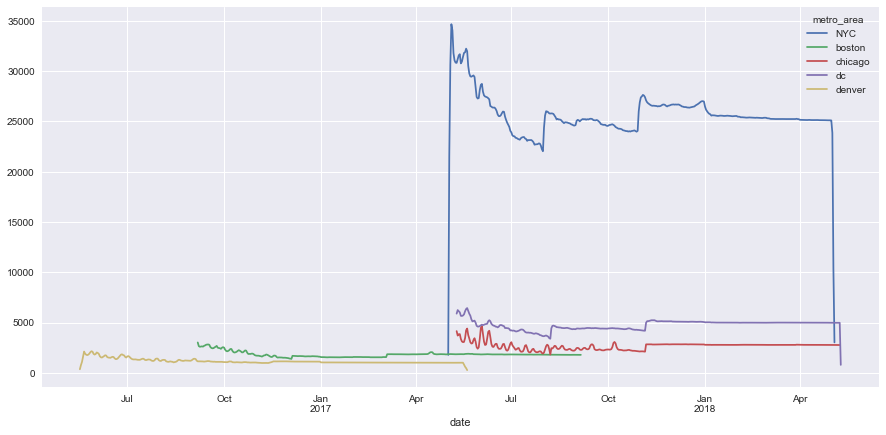

In [85]:
fig, ax = plt.subplots(figsize=(15,7))
unavailable.groupby(['date', 'metro_area']).count()['available'].unstack().plot(ax=ax)

### 2. When is the listing most available?

In [86]:
available = calendar.loc[calendar['available'] == 't']
# convert date from str to datetime
available['date'] = pd.to_datetime(available['date'])

/Users/tiffapedia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
print('num of rows: ', available.shape[0])
print('rows whose price is NA:', available['price'].isna().sum())

num of rows:  8618452
rows whose price is NA: 0


In [56]:
print('all cities in calendar.csv: ', calendar['metro_area'].unique())
print('cities with availabilities: ', available['metro_area'].unique())

all cities in calendar.csv:  ['NYC' 'denver' 'chicago' 'boston' 'dc']
cities with availabilities:  ['NYC' 'denver' 'chicago' 'boston' 'dc']


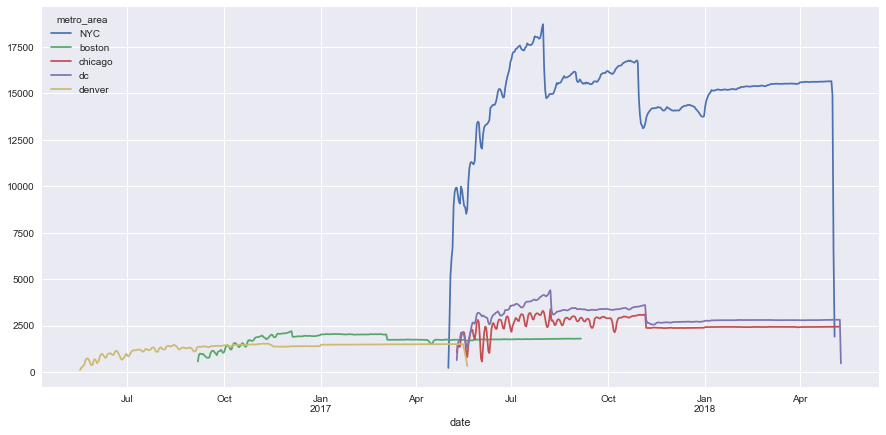

In [87]:
fig, ax = plt.subplots(figsize=(15,7))
available.groupby(['date', 'metro_area']).count()['available'].unstack().plot(ax=ax)

### Unavailable vs Available

I expected the graph to show the reverse of each other. It seems like it does. 

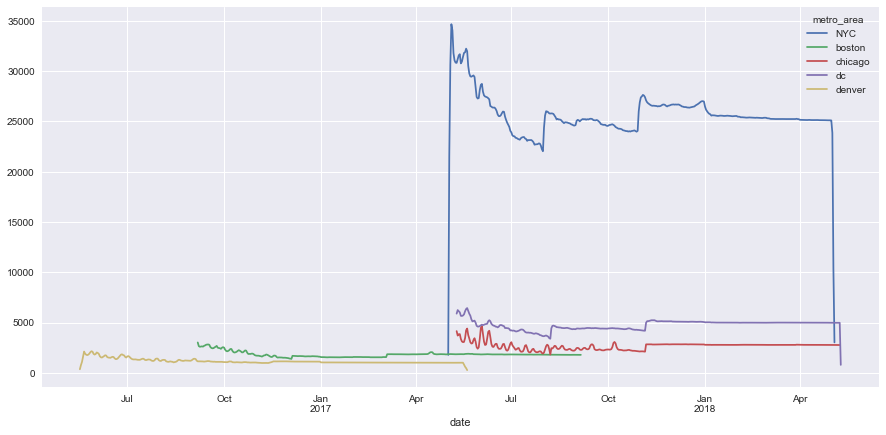

In [90]:
fig, ax = plt.subplots(figsize=(15,7))
unavailable.groupby(['date', 'metro_area']).count()['available'].unstack().plot(ax=ax)

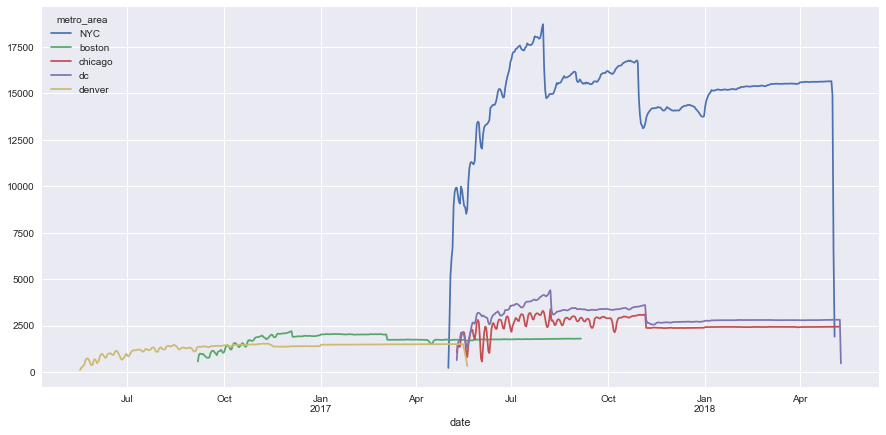

In [89]:
fig, ax = plt.subplots(figsize=(15,7))
available.groupby(['date', 'metro_area']).count()['available'].unstack().plot(ax=ax)

In [91]:
# TODO: validate length of time for different cities